In [1]:
import pandas as pd
import numpy as np
import pylab
import datetime as dt
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

# region

In [2]:
region = pd.read_pickle('company_region.pkl')
region['end_'] = pd.to_datetime(region['end_'], errors = 'coerce').dt.date
region['end_'] = region['end_'].fillna('2017-08-10')
region = region.rename(columns={"start_": "start", "end_": "end"})
region['end'] = pd.to_datetime(region["end"])

In [3]:
region_2015 = region.loc[(region['end'] > '2014-12-31') & (region['start'] < '2016-01-01')]
region_2015 = region_2015.set_index('company_id')
region_2015 = region_2015[['region']]

In [4]:
region_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1497235 entries, 1000 to 80031694
Data columns (total 1 columns):
region    1497235 non-null object
dtypes: object(1)
memory usage: 22.8+ MB


In [5]:
region_2015.head()

,region
company_id,
1000,US
10001,US
10002,US
10004,US
10006,US


# Ticker

In [6]:
comp_ticker = pd.read_pickle('company_ticker.pkl')
comp_ticker = comp_ticker.set_index('ticker')
comp_ticker = comp_ticker.dropna()

In [7]:
comp_ticker.head()

,company_id
ticker,
NYTAB,7260
ZIXI,17064
WFI,11182
GLBZ,1371015
EPAY,21280


# df_ml

In [8]:
df_ml_groups = pd.read_pickle('df_ml_groups.pkl')

In [36]:
df_ml_groups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15217 entries, 000032-CN to ZYT-GB
Data columns (total 19 columns):
out_degree_centrality      15217 non-null float64
in_degree_centrality       15217 non-null float64
closeness_centrality       15217 non-null float64
betweenness_centrality     15217 non-null float64
eigenvector_centrality     15217 non-null float64
harmonic_centrality        15217 non-null float64
average_neighbor_degree    15217 non-null float64
square_clustering          15217 non-null float64
core_number                15217 non-null float64
pagerank                   15217 non-null float64
hubs                       15217 non-null float64
authorities                15217 non-null float64
out_degree2015             15217 non-null float64
in_degree2015              15217 non-null float64
out_degree2016             15217 non-null float64
in_degree2016              15217 non-null float64
diff_indegree              15217 non-null float64
diff_outdegree             15217 non-

In [9]:
ticker_id = df_ml_groups.join(comp_ticker, how='inner')

In [10]:
ticker_id = ticker_id.reset_index()
ticker_id = ticker_id.set_index('company_id')

In [11]:
ticker_id_region = ticker_id.join(region_2015, how='inner')

In [12]:
ticker_id_region.drop_duplicates(subset='index', keep='first', inplace=True)

In [13]:
# ticker_id_region = ticker_id_region.reset_index()
# ticker_id_region = ticker_id_region.set_index(['company_id','region'])

In [14]:
ticker_id_region.head()

,index,out_degree_centrality,in_degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,harmonic_centrality,average_neighbor_degree,square_clustering,core_number,...,hubs,authorities,out_degree2015,in_degree2015,out_degree2016,in_degree2016,diff_indegree,diff_outdegree,group,region
company_id,,,,,,,,,,,,,,,,,,,,,
1000,ATLR,0.000000,0.000060,0.089313,0.000000,1.946214e-05,1533.513167,0.000000,0.000000,1.0,...,0.000000,0.000050,0.0,1.0,0.0,1.0,0.0,0.0,1,US
10001,TRC,0.000301,0.000000,0.000000,0.000000,1.246922e-24,0.000000,5.200000,0.018018,3.0,...,0.000012,0.000000,5.0,0.0,6.0,1.0,1.0,1.0,2,US
10006,TELOZ,0.000060,0.000000,0.000000,0.000000,1.246922e-24,0.000000,51.000000,0.000000,1.0,...,0.000037,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1,US
1001,ATML,0.001263,0.000661,0.095878,0.000027,9.093967e-05,1667.295382,25.047619,0.001176,17.0,...,0.000225,0.000144,21.0,11.0,21.0,11.0,0.0,0.0,1,US
10017,SPK-NZ,0.000000,0.000842,0.142659,0.000000,2.436447e-02,2593.575794,0.000000,0.000000,12.0,...,0.000000,0.000309,0.0,14.0,2.0,8.0,-6.0,2.0,2,NZ


In [15]:
df_ml = ticker_id_region.rename(columns = {'index':'ticker'})

In [16]:
comp = pd.read_pickle('company.pkl')

In [17]:
comp = comp.set_index('id')

In [18]:
comp = comp[['cusip']]

In [19]:
len(comp['cusip'].unique()), len(comp.index.unique())

(169030, 276313)

In [20]:
ticker_id_region = ticker_id_region.join(comp, how='inner')

In [21]:
ticker_id_region.drop_duplicates(subset='index', keep='first', inplace=True)

In [22]:
ticker_id_region = ticker_id_region.reset_index()

In [23]:
ticker_id_region = ticker_id_region.rename(columns = {'level_0': 'company_id','index':'ticker'})

In [24]:
ticker_id_region_drop = ticker_id_region.dropna()

In [25]:
ticker_id_region_drop = ticker_id_region_drop.set_index('cusip')

In [26]:
ticker_id_region_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5884 entries, 04937110 to 87889520
Data columns (total 22 columns):
company_id                 5884 non-null object
ticker                     5884 non-null object
out_degree_centrality      5884 non-null float64
in_degree_centrality       5884 non-null float64
closeness_centrality       5884 non-null float64
betweenness_centrality     5884 non-null float64
eigenvector_centrality     5884 non-null float64
harmonic_centrality        5884 non-null float64
average_neighbor_degree    5884 non-null float64
square_clustering          5884 non-null float64
core_number                5884 non-null float64
pagerank                   5884 non-null float64
hubs                       5884 non-null float64
authorities                5884 non-null float64
out_degree2015             5884 non-null float64
in_degree2015              5884 non-null float64
out_degree2016             5884 non-null float64
in_degree2016              5884 non-null float64
diff_in

In [27]:
ticker_id_region_drop = ticker_id_region_drop.reset_index()
ticker_id_region_drop.head()

,cusip,company_id,ticker,out_degree_centrality,in_degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,harmonic_centrality,average_neighbor_degree,...,hubs,authorities,out_degree2015,in_degree2015,out_degree2016,in_degree2016,diff_indegree,diff_outdegree,group,region
0,04937110,1000,ATLR,0.000000,0.000060,0.089313,0.000000,1.946214e-05,1533.513167,0.000000,...,0.000000,0.000050,0.0,1.0,0.0,1.0,0.0,0.0,1,US
1,87908010,10001,TRC,0.000301,0.000000,0.000000,0.000000,1.246922e-24,0.000000,5.200000,...,0.000012,0.000000,5.0,0.0,6.0,1.0,1.0,1.0,2,US
2,87238210,10006,TELOZ,0.000060,0.000000,0.000000,0.000000,1.246922e-24,0.000000,51.000000,...,0.000037,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1,US
3,04951310,1001,ATML,0.001263,0.000661,0.095878,0.000027,9.093967e-05,1667.295382,25.047619,...,0.000225,0.000144,21.0,11.0,21.0,11.0,0.0,0.0,1,US
4,87927820,10017,SPK-NZ,0.000000,0.000842,0.142659,0.000000,2.436447e-02,2593.575794,0.000000,...,0.000000,0.000309,0.0,14.0,2.0,8.0,-6.0,2.0,2,NZ


In [28]:
ticker_id_region_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 23 columns):
cusip                      5884 non-null object
company_id                 5884 non-null object
ticker                     5884 non-null object
out_degree_centrality      5884 non-null float64
in_degree_centrality       5884 non-null float64
closeness_centrality       5884 non-null float64
betweenness_centrality     5884 non-null float64
eigenvector_centrality     5884 non-null float64
harmonic_centrality        5884 non-null float64
average_neighbor_degree    5884 non-null float64
square_clustering          5884 non-null float64
core_number                5884 non-null float64
pagerank                   5884 non-null float64
hubs                       5884 non-null float64
authorities                5884 non-null float64
out_degree2015             5884 non-null float64
in_degree2015              5884 non-null float64
out_degree2016             5884 non-null float64
in_degree2016 

In [210]:
sic = pd.read_sas('sic.sas7bdat', format = 'sas7bdat', encoding='iso-8859-1')
sic['cusip'] = sic['CUSIP']
#sic = sic.set_index('cusip')

In [221]:
sic.head()

,PERMNO,DATE,CUSIP,TICKER,SICCD,HSICCD,HSICMG,HSICIG,cusip
0,10001.0,2003-01-31,36720410,EWST,4920.0,4925.0,NaN,NaN,36720410
1,10001.0,2003-02-28,36720410,EWST,4920.0,4925.0,NaN,NaN,36720410
2,10001.0,2003-03-31,36720410,EWST,4920.0,4925.0,NaN,NaN,36720410
3,10001.0,2003-04-30,36720410,EWST,4920.0,4925.0,NaN,NaN,36720410
4,10001.0,2003-05-30,36720410,EWST,4920.0,4925.0,NaN,NaN,36720410


In [211]:
sic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308183 entries, 0 to 1308182
Data columns (total 9 columns):
PERMNO    1308183 non-null float64
DATE      1308183 non-null datetime64[ns]
CUSIP     1308183 non-null object
TICKER    1284561 non-null object
SICCD     1300836 non-null float64
HSICCD    1307981 non-null float64
HSICMG    140849 non-null float64
HSICIG    140849 non-null float64
cusip     1308183 non-null object
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 89.8+ MB


In [215]:
len(sic.index.unique()), len(sic['HSICCD'].unique())

(1308183, 949)

In [214]:
sic_1 = sic[['cusip','HSICCD']]
sic_1.drop_duplicates(subset='cusip', keep='first', inplace=True)
sic_1.head()

/Users/xingkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cusip,HSICCD
0,36720410,4925.0
176,05978R10,6020.0
298,23326910,3674.0
330,00103110,3081.0
499,46603210,2052.0


In [216]:
sic_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14796 entries, 0 to 1308085
Data columns (total 2 columns):
cusip     14796 non-null object
HSICCD    14771 non-null float64
dtypes: float64(1), object(1)
memory usage: 346.8+ KB


In [217]:
df = pd.merge(ticker_id_region_drop, sic_1, how = 'inner', on = 'cusip')

In [218]:
#df = ticker_id_region_drop.join(sic, how='inner')

In [219]:
df = df.reset_index()
df.head()

,index,cusip,company_id,ticker,out_degree_centrality,in_degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,harmonic_centrality,...,authorities,out_degree2015,in_degree2015,out_degree2016,in_degree2016,diff_indegree,diff_outdegree,group,region,HSICCD
0,0,87908010,10001,TRC,0.000301,0.000000,0.000000,0.000000,1.246922e-24,0.000000,...,0.000000,5.0,0.0,6.0,1.0,1.0,1.0,2,US,6531.0
1,1,87238210,10006,TELOZ,0.000060,0.000000,0.000000,0.000000,1.246922e-24,0.000000,...,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1,US,1311.0
2,2,04951310,1001,ATML,0.001263,0.000661,0.095878,0.000027,9.093967e-05,1667.295382,...,0.000144,21.0,11.0,21.0,11.0,0.0,0.0,1,US,3670.0
3,3,87927820,10017,SPK-NZ,0.000000,0.000842,0.142659,0.000000,2.436447e-02,2593.575794,...,0.000309,0.0,14.0,2.0,8.0,-6.0,2.0,2,NZ,4813.0
4,4,87927Y10,10018,TIT-IT,0.000541,0.002345,0.131438,0.000227,2.101549e-02,2392.346429,...,0.000585,9.0,39.0,17.0,50.0,11.0,8.0,2,IT,4813.0


In [206]:
df.drop_duplicates(subset='cusip', keep='first', inplace=True)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 25 columns):
index                      2390 non-null int64
cusip                      2390 non-null object
company_id                 2390 non-null object
ticker                     2390 non-null object
out_degree_centrality      2390 non-null float64
in_degree_centrality       2390 non-null float64
closeness_centrality       2390 non-null float64
betweenness_centrality     2390 non-null float64
eigenvector_centrality     2390 non-null float64
harmonic_centrality        2390 non-null float64
average_neighbor_degree    2390 non-null float64
square_clustering          2390 non-null float64
core_number                2390 non-null float64
pagerank                   2390 non-null float64
hubs                       2390 non-null float64
authorities                2390 non-null float64
out_degree2015             2390 non-null float64
in_degree2015              2390 non-null float64
out_degree2016  

In [208]:
df.T

,0,186,283,443,558,738,924,1110,1296,1428,...,359361,359507,359693,359879,360065,360251,360327,360513,360699,360862
index,0,186,283,443,558,738,924,1110,1296,1428,...,359361,359507,359693,359879,360065,360251,360327,360513,360699,360862
cusip,87908010,87238210,04951310,87927820,87927Y10,87936910,87938220,04956010,87966410,88034510,...,75043810,87546510,M8740S22,87666410,87227510,87235140,87815510,87823710,87237510,87889520
company_id,10001,10006,1001,10017,10018,10023,10025,1003,10046,10066,...,9929,9931,9944,9947,9957,9964,9967,9969,9993,9994
ticker,TRC,TELOZ,ATML,SPK-NZ,TIT-IT,TFX,TEF-ES,ATO,TLAB,TNC,...,RSHCQ,SKT,TATT-IL,TCO,TCB,6762-JP,TISI,TECD,TE,TECU
out_degree_centrality,0.000300607,6.01214e-05,0.00126255,0,0.000541093,0.000180364,0.000901822,0.000180364,0.00132267,0.000601214,...,0.000120243,0.000961943,0.00204413,0.00138279,0,0.0008417,0.00114231,0.00264534,6.01214e-05,0.000120243
in_degree_centrality,0,0,0.000661336,0.0008417,0.00234474,0.000180364,0.00721457,0.0008417,0.000601214,6.01214e-05,...,0.00156316,6.01214e-05,6.01214e-05,0,6.01214e-05,0.000781579,0,0.00198401,0.000541093,0.000180364
closeness_centrality,0,0,0.0958784,0.142659,0.131438,0.109161,0.155557,0.129212,0.111977,6.01214e-05,...,0.150457,0.106505,0.116702,0,6.01214e-05,0.120049,0,0.142762,0.124709,0.0972276
betweenness_centrality,0,0,2.65046e-05,0,0.000227378,0.000321389,0.00106481,0.000102458,5.49807e-05,1.35053e-05,...,2.63552e-05,1.7362e-05,0.000202461,0,0,0.000106986,0,0.00223986,1.90797e-05,3.51953e-07
eigenvector_centrality,1.24692e-24,1.24692e-24,9.09397e-05,0.0243645,0.0210155,0.00148904,0.0835209,0.0056727,0.00213502,2.36915e-23,...,0.0544704,0.000726882,0.00131165,1.24692e-24,2.36915e-23,0.00137326,1.24692e-24,0.036922,0.00370464,8.46437e-05
harmonic_centrality,0,0,1667.3,2593.58,2392.35,1922.57,2917.41,2325.03,1984.1,1,...,2771.53,1855.45,2057.51,0,1,2126.1,0,2614.63,2216.24,1685.56


In [164]:
df.head()

,index,cusip,company_id,ticker,out_degree_centrality,in_degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,harmonic_centrality,...,authorities,out_degree2015,in_degree2015,out_degree2016,in_degree2016,diff_indegree,diff_outdegree,group,region,SICCD
0,0,00036110,49,AIR,0.000481,0.00012,0.131559,4.480512e-05,5.836003e-03,2357.346429,...,0.000061,8.0,2.0,35.0,2.0,0.0,27.0,2,US,5088.0
186,186,00037520,240037,ABBN-CH,0.002826,0.00487,0.138911,2.053840e-03,2.060184e-02,2555.543651,...,0.001696,47.0,81.0,57.0,95.0,14.0,10.0,2,CH,8742.0
372,372,00081T10,1752918,ACCO,0.000240,0.00012,0.000120,6.006800e-07,4.613612e-23,2.000000,...,0.000016,4.0,2.0,3.0,3.0,1.0,-1.0,0,US,NaN
528,528,00083310,1816382,MANF,0.000060,0.00000,0.000000,0.000000e+00,1.246922e-24,0.000000,...,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1,US,NaN
543,543,00095710,72,ABM,0.000301,0.00012,0.112799,4.997989e-05,1.798198e-03,1987.188312,...,0.000001,5.0,2.0,4.0,2.0,0.0,-1.0,0,US,7349.0


In [34]:
ticker_id_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15217 entries, 0 to 15216
Data columns (total 23 columns):
company_id                 15217 non-null object
ticker                     15217 non-null object
out_degree_centrality      15217 non-null float64
in_degree_centrality       15217 non-null float64
closeness_centrality       15217 non-null float64
betweenness_centrality     15217 non-null float64
eigenvector_centrality     15217 non-null float64
harmonic_centrality        15217 non-null float64
average_neighbor_degree    15217 non-null float64
square_clustering          15217 non-null float64
core_number                15217 non-null float64
pagerank                   15217 non-null float64
hubs                       15217 non-null float64
authorities                15217 non-null float64
out_degree2015             15217 non-null float64
in_degree2015              15217 non-null float64
out_degree2016             15217 non-null float64
in_degree2016              15217 non-null f

In [29]:
region_hist = pd.DataFrame(ticker_id_region.groupby('region').size(), columns = ['numbers'])

In [30]:
region_hist = region_hist.reset_index()

In [31]:
region_hist =region_hist.sort_values(['numbers'], ascending = False)

In [32]:
region_hist.head()

,region,numbers
102,US,2964
52,JP,1433
2,AMERICAS,1420
4,ASIAPAC,1119
20,CN,621


In [33]:
len(region_hist['region'].unique())

110

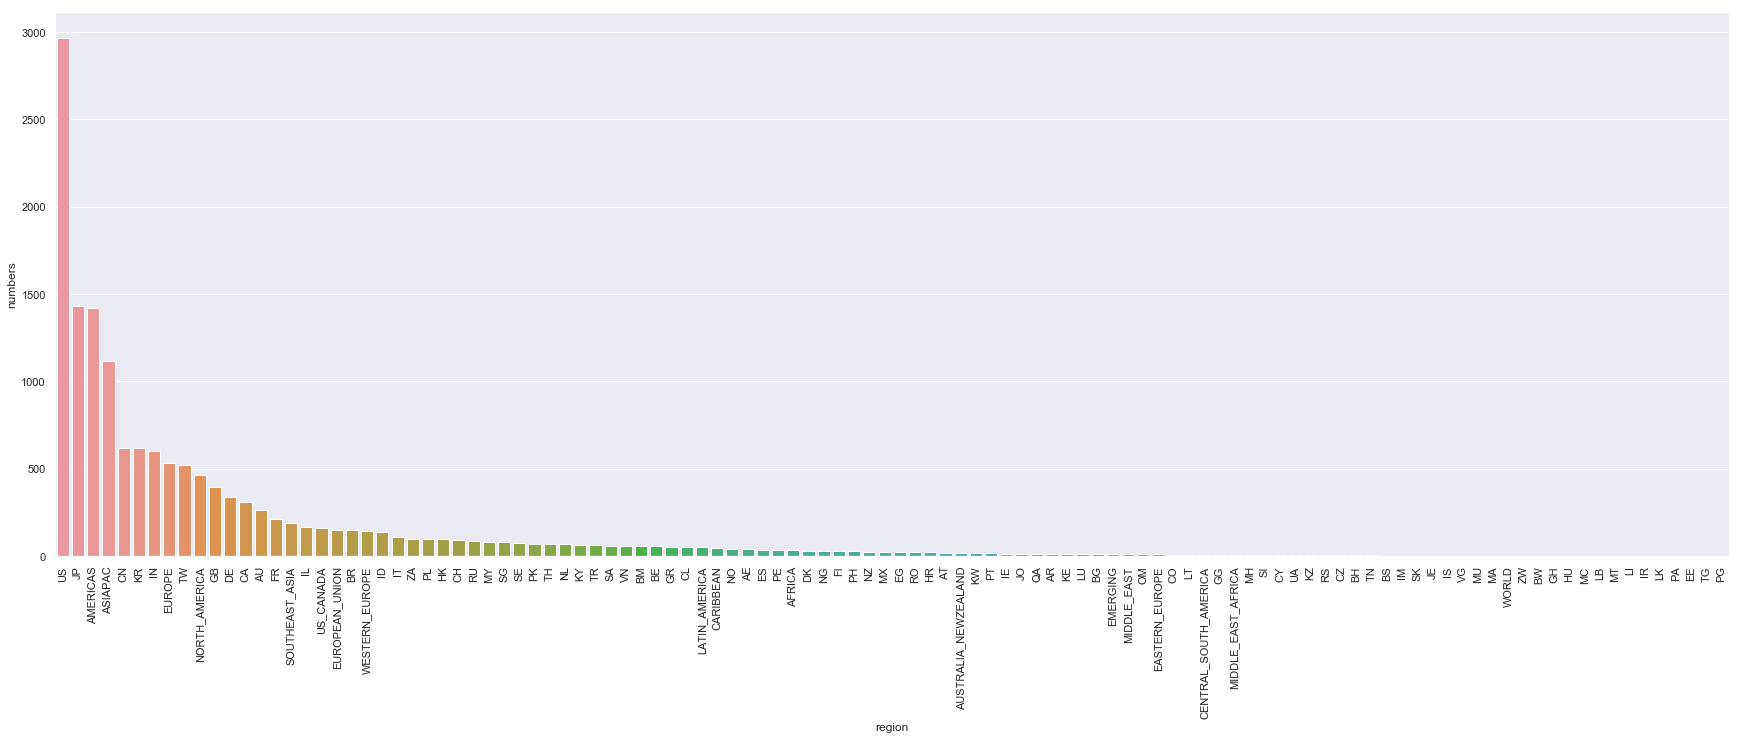

In [127]:
plt.figure(figsize=(30,10))
# plot barh chart with index as x values
ax = sns.barplot(region_hist['region'],region_hist['numbers'])
ax.set_xticklabels(region_hist['region'])
for item in ax.get_xticklabels(): item.set_rotation(90)
pylab.rcParams['figure.figsize'] = (30, 10)
pylab.savefig('supply_chain_num.png', dpi=400, bbox_inches = 'tight')

In [74]:
len(ticker_id_region.index.unique())

15180

In [263]:
df_customers = pd.read_pickle('customers_clean.pkl')
df_suppliers = pd.read_pickle('suppliers_clean.pkl')
df = pd.concat([df_customers, df_suppliers])

In [264]:
df = df[df['start'] != df['end']]

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226909 entries, 0 to 63235
Data columns (total 8 columns):
id               226909 non-null object
start            226909 non-null datetime64[ns]
end              226909 non-null datetime64[ns]
rel_type         226909 non-null object
source_ticker    226909 non-null object
target_ticker    226909 non-null object
source_cusip     226909 non-null object
target_cusip     226909 non-null object
dtypes: datetime64[ns](2), object(6)
memory usage: 15.6+ MB


In [266]:
df.head()

,id,start,end,rel_type,source_ticker,target_ticker,source_cusip,target_cusip
0,CUST-100000247,2016-11-03,2017-08-10,CUSTOMER,IW5-SG,ADRO-ID,Y7693G104,Y7087B109
1,CUST-100000500,2016-11-03,2017-08-10,CUSTOMER,IW5-SG,INTP-ID,Y7693G104,Y7127B135
2,CUST-100001093,2016-11-03,2017-08-10,CUSTOMER,OANDO-NG,XOM,V6796A108,30231G102
3,CUST-100001232,2016-11-03,2017-08-10,CUSTOMER,533278-IN,500470-IN,Y1668L107,Y8547N139
4,CUST-100001451,2016-11-03,2017-08-10,CUSTOMER,533278-IN,526371-IN,Y1668L107,Y6223W100


In [267]:
G = nx.from_pandas_edgelist(df, 'source_ticker', 'target_ticker', create_using = nx.DiGraph())

In [268]:
revere_comp = pd.DataFrame(pd.Series(G.nodes()), columns = ['ticker'])

In [269]:
len(revere_comp.index.unique())

23686

In [270]:
#revere_comp = revere_comp.set_index('cusip')
revere_comp.head()

,ticker
0,IW5-SG
1,ADRO-ID
2,INTP-ID
3,OANDO-NG
4,XOM


In [297]:
company = pd.read_pickle('company.pkl')

In [298]:
company.head()

,id,ticker,cusip,sedol
0,1647,BPL,11823010,None
1,4084,FMER,33791510,None
2,236891,ELUX,01019820,None
3,6729,MPOW,62473L30,None
4,5101,HMT,44107P10,None


In [299]:
df_1 = pd.merge(revere_comp, company, how = 'inner', on = 'ticker')

In [301]:
df_1= df_1.drop_duplicates(subset='ticker', keep='first')

In [302]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23686 entries, 0 to 198024
Data columns (total 4 columns):
ticker    23686 non-null object
id        23686 non-null object
cusip     23317 non-null object
sedol     18927 non-null object
dtypes: object(4)
memory usage: 925.2+ KB


In [303]:
df_2 = df_1.dropna()

In [304]:
df_2 = df_2.drop_duplicates(subset='ticker', keep='first')

In [305]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18903 entries, 0 to 198024
Data columns (total 4 columns):
ticker    18903 non-null object
id        18903 non-null object
cusip     18903 non-null object
sedol     18903 non-null object
dtypes: object(4)
memory usage: 738.4+ KB


In [306]:
df_2.head()

,ticker,id,cusip,sedol
0,IW5-SG,194505765,Y53350115,6388755
7,ADRO-ID,21997399,Y7087B109,B3BQFC4
13,INTP-ID,21998335,Y7127B135,6454861
19,OANDO-NG,22443458,V6796A108,6241405
48,533278-IN,194527177,Y1668L107,B4Z9XF5


In [285]:
sic = pd.read_sas('sic.sas7bdat', encoding='iso-8859-1')

In [286]:
sic['cusip'] = sic['CUSIP']

In [289]:
sic['ticker'] = sic['TICKER']

In [290]:
#sic = sic.set_index('cusip')
sic.head()

,PERMNO,DATE,CUSIP,TICKER,SICCD,HSICCD,HSICMG,HSICIG,cusip,ticker
0,10001.0,2003-01-31,36720410,EWST,4920.0,4925.0,NaN,NaN,36720410,EWST
1,10001.0,2003-02-28,36720410,EWST,4920.0,4925.0,NaN,NaN,36720410,EWST
2,10001.0,2003-03-31,36720410,EWST,4920.0,4925.0,NaN,NaN,36720410,EWST
3,10001.0,2003-04-30,36720410,EWST,4920.0,4925.0,NaN,NaN,36720410,EWST
4,10001.0,2003-05-30,36720410,EWST,4920.0,4925.0,NaN,NaN,36720410,EWST


In [307]:
df_3 = pd.merge(sic, df_1, how = 'inner', on = 'cusip')

In [310]:
df_3 = df_3.drop_duplicates(subset='cusip', keep='first')

In [311]:
df_3.head()

,PERMNO,DATE,CUSIP,TICKER,SICCD,HSICCD,HSICMG,HSICIG,cusip,ticker_x,ticker_y,id,sedol
0,10002.0,2003-01-31,05978R10,BTFG,6020.0,6020.0,NaN,NaN,05978R10,BTFG,BTFG,9435,None
122,10025.0,2003-01-31,00103110,AEPI,3070.0,3081.0,NaN,NaN,00103110,AEPI,AEPI,226,None
291,10026.0,2003-01-31,46603210,JJSF,2052.0,2052.0,NaN,NaN,46603210,JJSF,JJSF,5676,None
477,10032.0,2003-01-31,72913210,PLXS,3670.0,3670.0,NaN,NaN,72913210,PLXS,PLXS,8156,None
663,10051.0,2003-01-31,41043F20,HGR,3842.0,8093.0,NaN,NaN,41043F20,HGR,HGR,4786,None


In [312]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3463 entries, 0 to 455130
Data columns (total 13 columns):
PERMNO      3463 non-null float64
DATE        3463 non-null datetime64[ns]
CUSIP       3463 non-null object
TICKER      2544 non-null object
SICCD       2623 non-null float64
HSICCD      3462 non-null float64
HSICMG      51 non-null float64
HSICIG      51 non-null float64
cusip       3463 non-null object
ticker_x    2544 non-null object
ticker_y    3463 non-null object
id          3463 non-null object
sedol       397 non-null object
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 378.8+ KB


In [260]:
df_1 = pd.concat([revere_comp, sic], axis=1, join_axes=[revere_comp.index])

In [262]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23686 entries, Y7693G104 to N3070G108
Data columns (total 8 columns):
PERMNO    0 non-null float64
DATE      0 non-null datetime64[ns]
CUSIP     0 non-null object
TICKER    0 non-null object
SICCD     0 non-null float64
HSICCD    0 non-null float64
HSICMG    0 non-null float64
HSICIG    0 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.6+ MB


In [250]:
df.index

Index(['Y7693G104', 'Y7087B109', 'Y7127B135', 'V6796A108', '30231G102',
       'Y1668L107', 'Y8547N139', 'Y6223W100', 'J12459103', '478160104',
       ...
       'Y8134S103', 'Y8T71W108', 'Y9859R106', 'Y0004D100', 'X7832X100',
       'T8660G149', 'D344UQ206', 'V50247101', 'F53098103', 'N3070G108'],
      dtype='object', name='cusip', length=23686)